In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
TRAIN = pd.read_csv(r"C:\Users\Miguel Sarmiento\Documents\Cursos\curso phyton\train.csv")

In [4]:
TRAIN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# Analisis de nulos

NameError: name 'df' is not defined

In [9]:
TRAIN.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#Se omitiran las columnas con nulos y que tengan valores nulos significativos en este caso: MiscFeature, Fence, PoolQC, GarageCond, GarageQual, FireplaceQu, GarageType, GarageFinish, Electrical, BsmtFinType1, BsmtFinType2, BsmtExposure, BsmtCond, BsmtQual, MasVnrType, Alley LotFrontage, MasVnrArea, GarageYrBlt.


In [14]:
TRAIN = TRAIN.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
              'Electrical', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Alley', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [15]:
TRAIN.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [ ]:
# Se genera variable binaria usando sales price


In [16]:
TRAIN['SalesPriceBinary'] = np.where(TRAIN['SalePrice'] >= 214000.000000, 1, 0)

In [ ]:
# Al tener la vriable binaria podemos eliminar SalePrice e id


In [17]:
TRAIN = TRAIN.drop(columns=['Id', 'SalePrice'])

In [ ]:
# Finalmente dejamos meramente variables enteras para aplicar los modelos con esto ya el dataset quedaría listo


In [18]:
TRAIN = TRAIN.select_dtypes(include='number')

0    1093
1     367
Name: SalesPriceBinary, dtype: int64

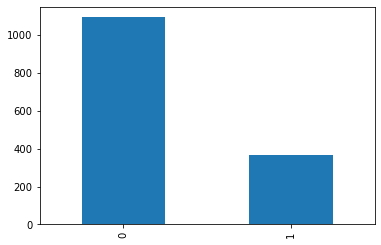

In [21]:
y = TRAIN['SalesPriceBinary']
x = TRAIN.iloc[:, 0:len(TRAIN.columns)-1]

TRAIN['SalesPriceBinary'].value_counts().sort_index().plot.bar()
TRAIN['SalesPriceBinary'].value_counts()

In [ ]:
#una vez el dataset definido aplicaremos el arbol de decisión##################################################################


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt

dt = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=80,
                                            min_samples_leaf=40,
                                            max_depth = 5,
                                            class_weight='balanced')
tree = dt.fit(x, y)

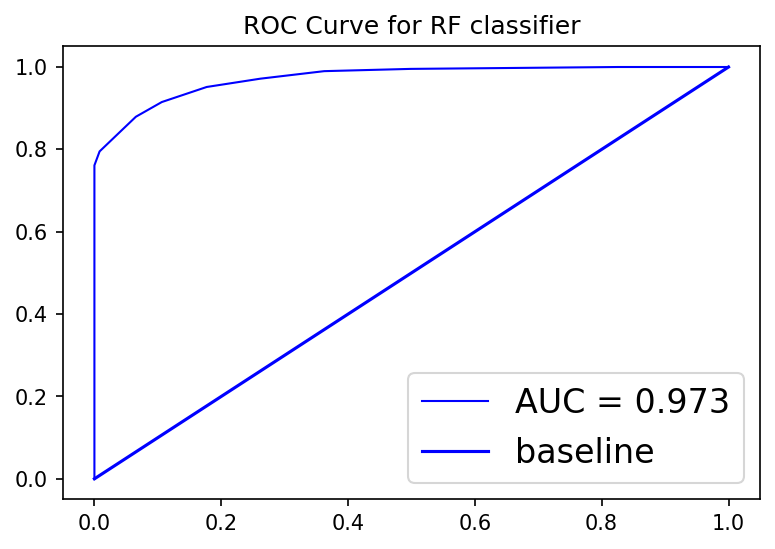

In [23]:
from sklearn.metrics import roc_curve, auc

probas = tree.predict_proba(x)

fpr, tpr, thresholds = roc_curve(y, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y, [1 for _ in range(len(y))])

roc_auc = auc(fpr, tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='blue', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 16

plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

In [24]:
cm = confusion_matrix(y, tree.predict(x))
cm

array([[961, 132],
       [ 24, 343]], dtype=int64)

In [ ]:
#ahora aplicaremos metricas de Gradient Boosting para Arbol de decision


In [25]:
Accuracy = (cm[0][0] + cm[1][1]) / ((cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
Sensitividad = (cm[1][1]) / (cm[1][0] + cm[1][1])
Especificidad = (cm[0][0]) / (cm[0][0] + cm[0][1])

if (cm[1][1] == 0):
    Recall = 0.0
else:
    Recall = (cm[1][1]) / (cm[1][1] + cm[0][1]) 

if (cm[0][0] == 0):
    Presicion = 0.0
else:
    Presicion = cm[0][0] / (cm[0][0] + cm[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Recall ',Recall)
print('Presicion ',Presicion)


Accuracy  0.8931506849315068
Especificidad  0.879231473010064
Sensitividad  0.9346049046321526
Recall  0.7221052631578947
Presicion  0.9756345177664975


In [ ]:
#Ahora Aplicaremos Ramdom forest #######################################################################################


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
Random_F = RandomForestClassifier(n_estimators = 100, max_depth=0.5, random_state=0)
Random_Fit = Random_F.fit(x, y)

In [28]:
cm = confusion_matrix(y, Random_Fit.predict(x))
cm

array([[1093,    0],
       [ 367,    0]], dtype=int64)

In [ ]:
#sacamos las metricas de Gradient Boosting para el ramdom forest


In [29]:
Accuracy = (cm[0][0] + cm[1][1]) / ((cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
Sensitividad = (cm[1][1]) / (cm[1][0] + cm[1][1])
Especificidad = (cm[0][0]) / (cm[0][0] + cm[0][1])

if (cm[1][1] == 0):
    Recall = 0.0
else:
    Recall = (cm[1][1]) / (cm[1][1] + cm[0][1]) 

if (cm[0][0] == 0):
    Presicion = 0.0
else:
    Presicion = cm[0][0] / (cm[0][0] + cm[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Recall ',Recall)
print('Presicion ',Presicion)

Accuracy  0.7486301369863013
Especificidad  1.0
Sensitividad  0.0
Recall  0.0
Presicion  0.7486301369863013


In [ ]:
#Finalmente Applicaremos el modelo de Gradient Boosting#####################################################


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(x, y)

In [31]:
clf.score(x, y)

0.9801369863013699

In [32]:
cm = confusion_matrix(y, clf.predict(x))
cm

array([[1083,   10],
       [  19,  348]], dtype=int64)

In [ ]:
#metricas Gradient Boosting


In [33]:
Accuracy = (cm[0][0] + cm[1][1]) / ((cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
Sensitividad = (cm[1][1]) / (cm[1][0] + cm[1][1])
Especificidad = (cm[0][0]) / (cm[0][0] + cm[0][1])

if (cm[1][1] == 0):
    Recall = 0.0
else:
    Recall = (cm[1][1]) / (cm[1][1] + cm[0][1]) 

if (cm[0][0] == 0):
    Presicion = 0.0
else:
    Presicion = cm[0][0] / (cm[0][0] + cm[1][0])
    
print('Accuracy ', Accuracy)
print('Especificidad ', Especificidad)
print('Sensitividad ',Sensitividad)
print('Recall ',Recall)
print('Presicion ',Presicion)

Accuracy  0.9801369863013699
Especificidad  0.9908508691674291
Sensitividad  0.9482288828337875
Recall  0.9720670391061452
Presicion  0.9827586206896551


Feature: 0, Score: 0.00366
Feature: 1, Score: 0.01987
Feature: 2, Score: 0.63885
Feature: 3, Score: 0.00253
Feature: 4, Score: 0.01478
Feature: 5, Score: 0.01203
Feature: 6, Score: 0.02060
Feature: 7, Score: 0.00408
Feature: 8, Score: 0.00634
Feature: 9, Score: 0.06153
Feature: 10, Score: 0.00063
Feature: 11, Score: 0.00792
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.17713
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00122
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00601
Feature: 21, Score: 0.00159
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00557
Feature: 24, Score: 0.00097
Feature: 25, Score: 0.00131
Feature: 26, Score: 0.00277
Feature: 27, Score: 0.00231
Feature: 28, Score: 0.00177
Feature: 29, Score: 0.00453
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00048
Feature: 32, Score: 0.00154


<BarContainer object of 33 artists>

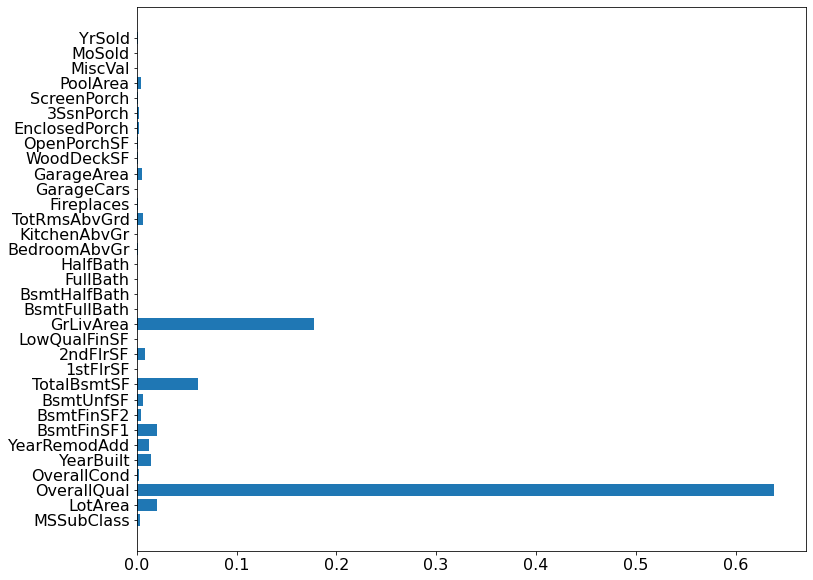

In [34]:
importance = clf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.subplots(figsize=(12,10))
plt.barh(x.columns, clf.feature_importances_)

In [ ]:
##Conclusiones
#De los modelos analisados El que mejores metricas obtuvo fue el gradient boosting
#Accuracy  0.9801369863013699
#Especificidad  0.9908508691674291
#Sensitividad  0.9482288828337875
#Recall  0.9720670391061452
#Presicion  0.9827586206896551

#Resaltando como el modelo mas asertado 
#Actividad presentada por Miguel Angel Sarmiento Acosta email:miguel.sarmiento@bpsconsultores.com